# 决策树实现鸢尾花数据分类
机器学习 决策树（(Decision Tree）

# 加载数据集

In [79]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris() 
x = iris.data              #特征数据
y = iris.target            #分类数据
ic = pd.DataFrame(data = np.c_[x,y],columns = np.append(iris.feature_names,['species']))

ic.head(5)            #显示前五个数据

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# 观察数据集
数据共150行，4列，4个字段中均有150个非空的float64类型的数值，即没有空值。 在上述数据中显示，鸢尾花不同种类用0.0，1.0，2.0来区分。

样本的类别label含义 0 山鸢尾（setosa） 1 变色鸢尾（versicolor） 2 维吉尼亚鸢尾（virginica）

150个样本中，三个种类的鸢尾花各占1/3，均为50个样本。

In [80]:
ic.info()  #检查缺失
ic['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


2.0    50
1.0    50
0.0    50
Name: species, dtype: int64

# 创建训练集和测试集
原始数据集中三种花的比例为1：1：1,使得训练集和测试集中三种花的比例也满足1：1：1。

train_test_split函数可以实现按比例划分。 stratify参数设置成预测变量y，表示按照species的取值比例来进行数据划分。

random_state相当于随机数种子random.seed() 。为了保证程序每次运行都分割一样的训练集和测试集。否则，同样的算法模型在不同的训练集和测试集上的效果不一样。


In [81]:
from sklearn.cross_validation import train_test_split

feature_train,feature_test,target_train,target_test = train_test_split (x,y,test_size=0.3, random_state=42,stratify=y)

target_train    #查看数据集划分结果，可见顺序打乱，并且只包含有整个训练集的 70% 数据

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

# 模型训练、评估
从 scikit-learn 中导入决策树分类器,使用sklearn决策树模型对数据拟合

sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息。 

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

idt = DecisionTreeClassifier()             # 所有参数均置为默认状态
idt.fit(feature_train,target_train)        # 使用训练集训练模型
target_predict = idt.predict(feature_test) # 使用模型对测试集进行预测
train_score = idt.score(feature_train,target_train)    #判断拟合优度
test_score = idt.score(feature_test,target_test)
print('train score:{0};test score:{1}'.format(train_score,test_score)) #format 格式化字符串的函数  0 1 设置位置
print(classification_report(target_predict,target_test))

train score:1.0;test score:0.9111111111111111
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.87      0.87      0.87        15
          2       0.87      0.87      0.87        15

avg / total       0.91      0.91      0.91        45



# 可视化
决策树可视化，使用graphviz软件。

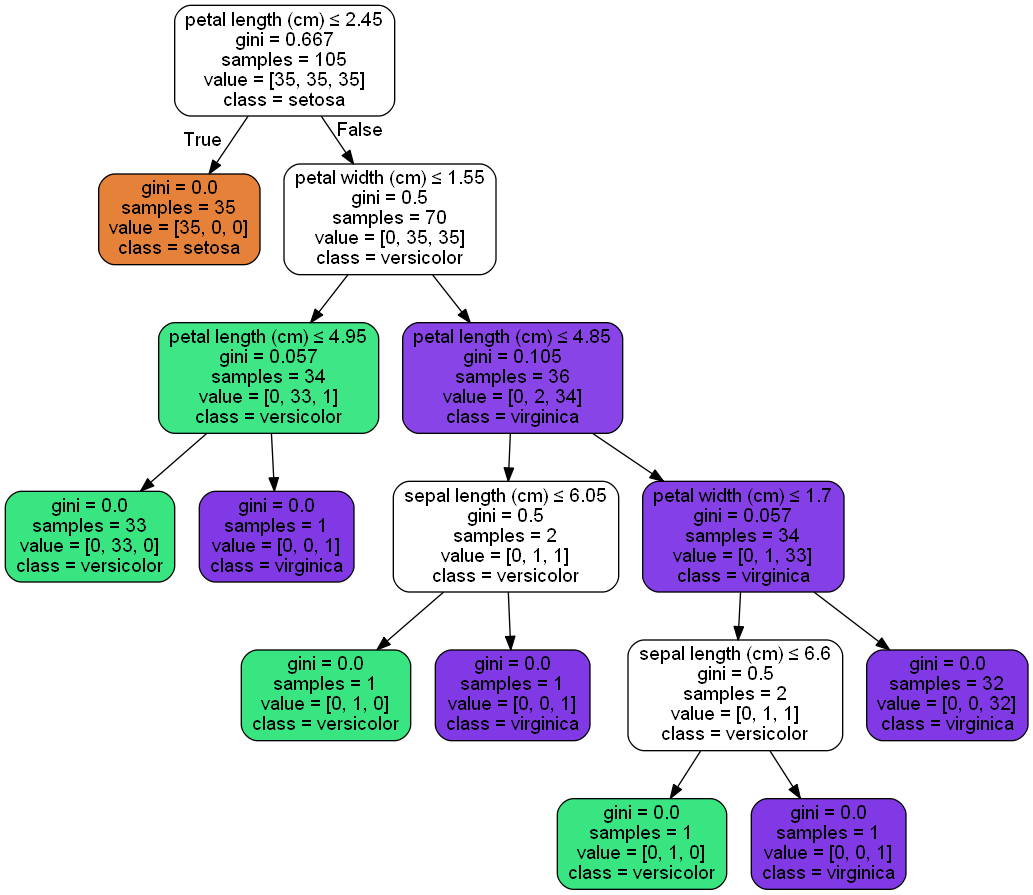

In [83]:
from sklearn import tree
import sys
import os       
os.environ["PATH"] += os.pathsep + 'E:/Program Files (x86)/Graphviz2.38/bin/'  #找到graphviz 路径 

import pydotplus    #生成决策树可视化图用包  

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(idt, out_file=f)     #在目录下保存为.dot文件

dot_data = tree.export_graphviz(idt, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)    #生成图片
Image(graph.create_png()) 

# 结果分析
根据可视化结构树可看出，在决策树第一层时，根据花瓣长度小于等于2.45，已经把 0 山鸢尾（setosa） 从所有分类数据中分类出来，为否时，在第二层根据花瓣宽度小于等于1.55，将数据集分为两部分，两部分均含有剩下两种鸢尾花。

第三层分别根据花瓣长度进行分类，在判断花瓣长度小于等于4.95时，将此部分数据集下1 变色鸢尾（versicolor） 2 维吉尼亚鸢尾（virginica）完全区分开来，另一部分判断花瓣长度小于等于4.85，将数据集分为两部分。

第四层一部分根据花萼长度小于等于6.05将 1，2 区分开来，另一部分根据花瓣宽度小于1.7将大部分 2维吉尼亚鸢尾（virginica） 从数据集中区分出来。

第五层根据花萼成都小于等于6.6区分出剩下的两个数据。